# Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

### Goal Of The Case Study

There are quite a few goals for this case study:


Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### EDA

#### Step 1 Load Data

In [1588]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1589]:
# import data
lead_df = pd.read_csv('Leads.csv')

In [1590]:
# check dataset
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### Inspect the Data

Observation : Multiple values are not selected

In [1591]:
# data shape
lead_df.shape

(9240, 37)

In [1592]:
# datatype
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Note : We have missing value 

In [1593]:
# describe the dat.
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Step 2 Data Cleaning

In [1594]:
# Treatment of not selected data.
lead_df = lead_df.replace('Select',np.nan)

In [1595]:
# verify
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### Missing Value Teatment

In [1596]:
# Checking for duplicates and dropping the entire duplicate row if any:-

lead_df.drop_duplicates(subset=None, inplace=True)

In [1597]:
# Checking for null values.
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1598]:
# Null value in %.
round(lead_df.isnull().sum()*100/lead_df['Prospect ID'].count(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1599]:
# dropping the columns with missing values greater than or equal to 39% .
lead_df=lead_df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','City',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [1600]:
# Null value in %.
round(lead_df.isnull().sum()*100/lead_df['Prospect ID'].count(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Observation: Still we have 5 columns which has huge null values.

In [1601]:
# check columns data 
lead_df.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [1602]:
lead_df.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [1603]:
# visualize data
def missing_data(cl_nm):
    plt.figure(figsize=(17,5))
    sns.histplot(cl_nm)
    plt.xticks(rotation=90)
    

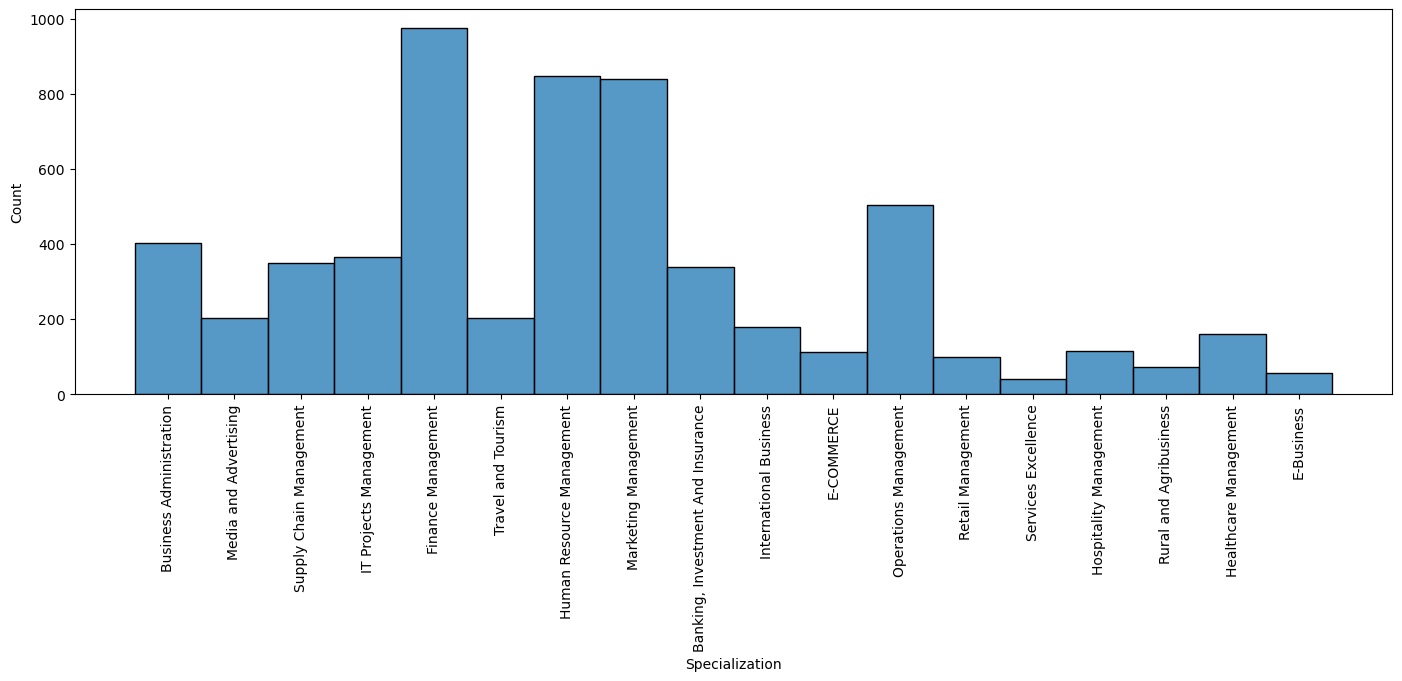

In [1604]:
missing_data(lead_df.Specialization)

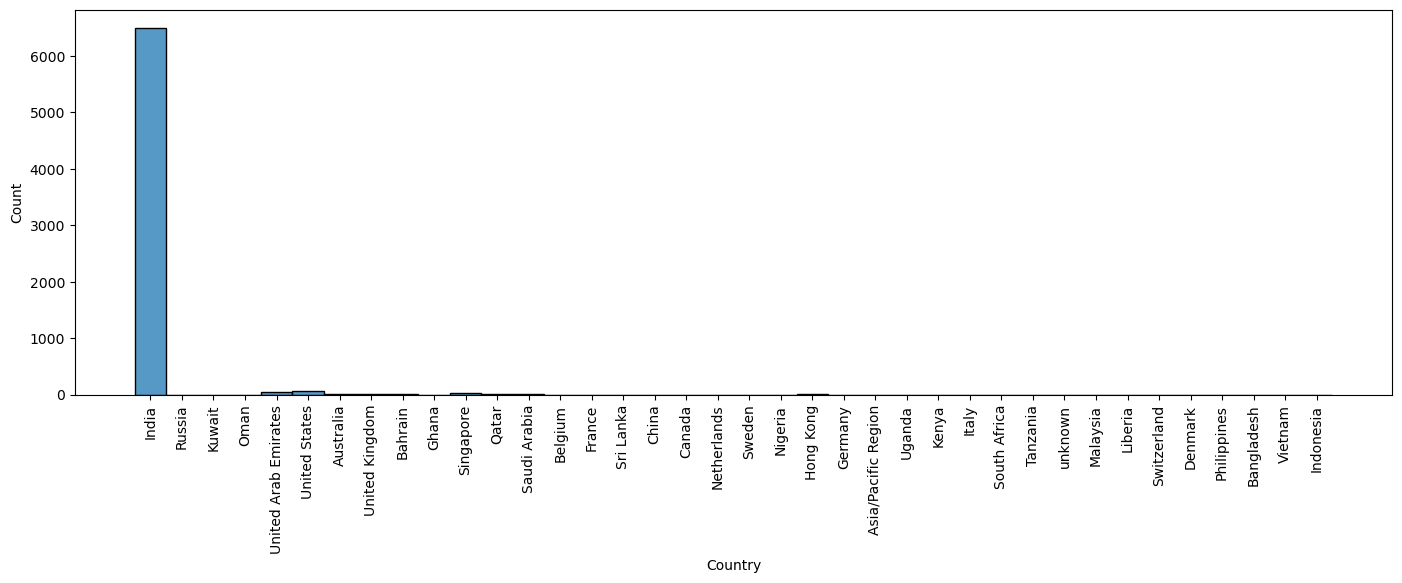

In [1605]:
missing_data(lead_df.Country)

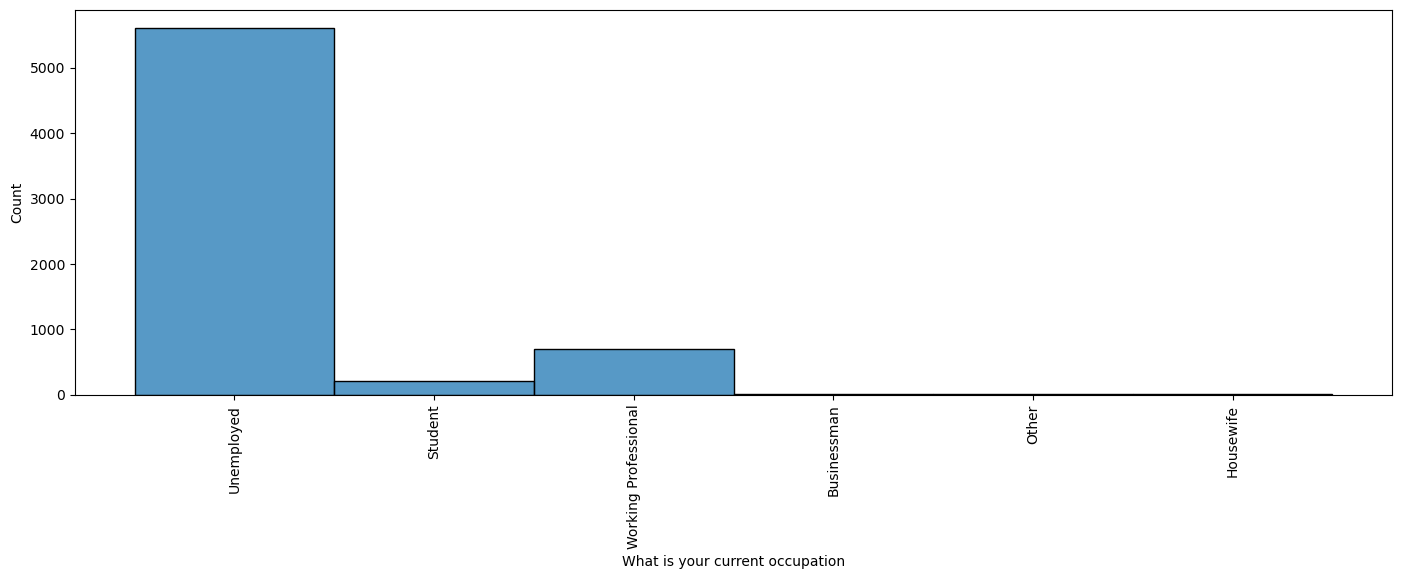

In [1606]:
missing_data(lead_df['What is your current occupation'])

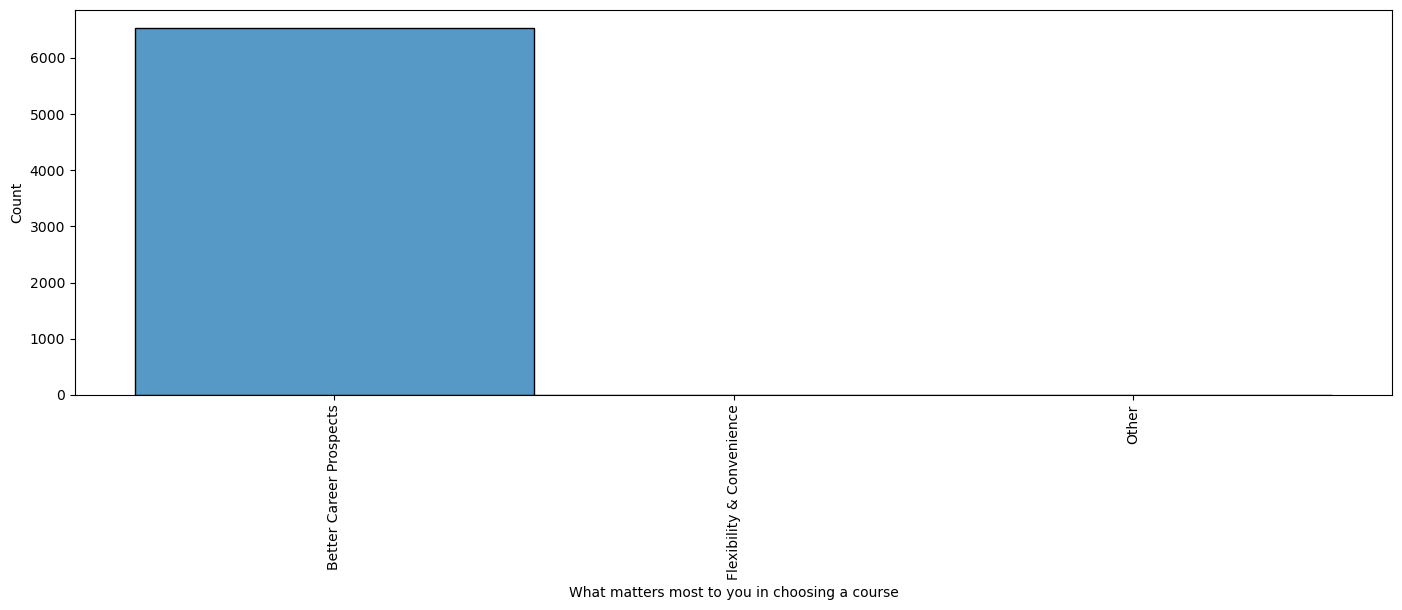

In [1607]:
missing_data(lead_df['What matters most to you in choosing a course'])

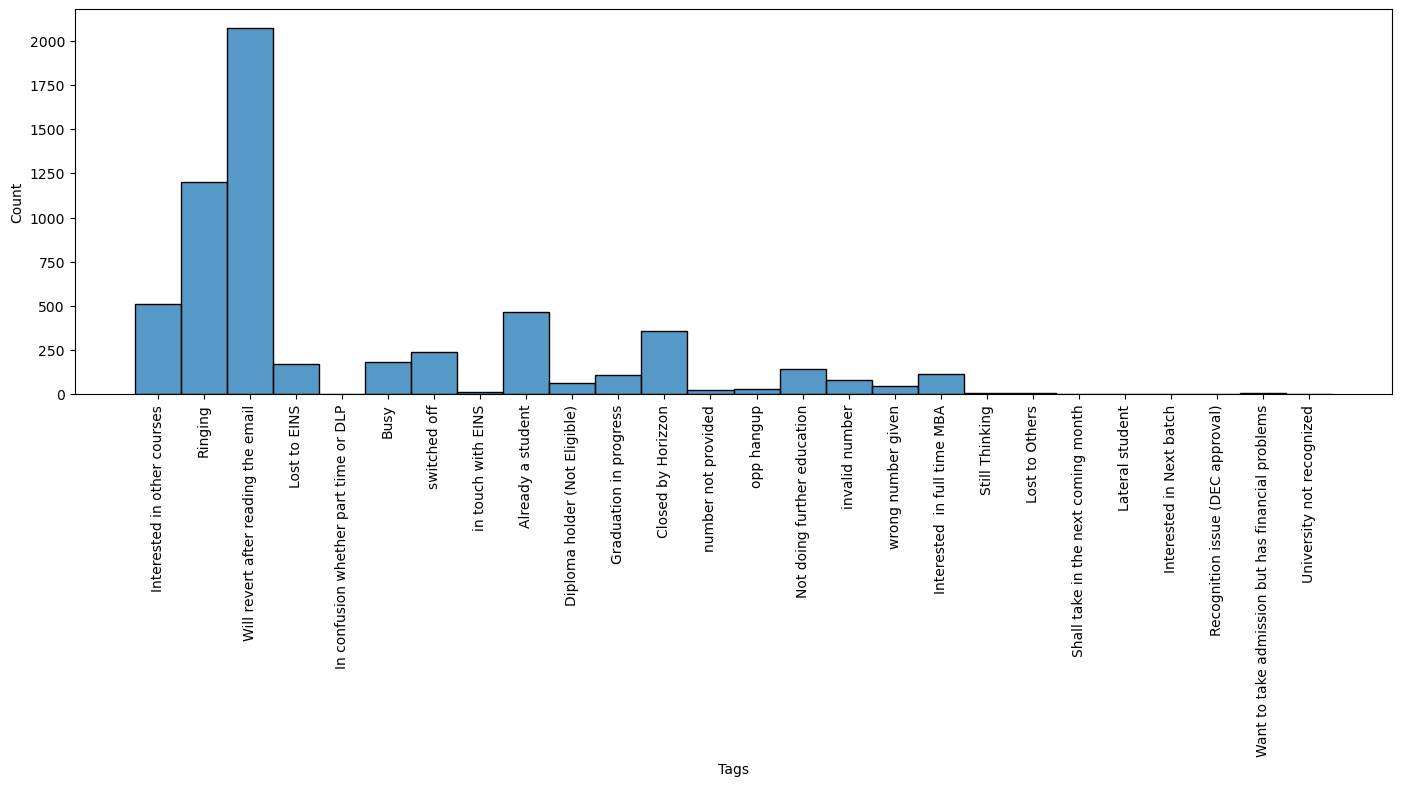

In [1608]:
missing_data(lead_df.Tags)

In [1609]:
lead_df.shape

(9240, 29)

In [1610]:
# dropping columns

lead_df.drop(['Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
lead_df.shape

(9240, 26)

In [1611]:
# Null value in %.
round(lead_df.isnull().sum()*100/lead_df['Prospect ID'].count(),2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                              36.58
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


In [1612]:
# check missing value 
missing_values_df = lead_df[lead_df['TotalVisits'].isnull()]
missing_values_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,...,No,No,No,No,No,No,No,No,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,NaN,705,NaN,...,No,No,No,No,No,No,No,No,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,...,No,No,No,No,No,No,No,No,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,...,No,No,No,No,No,No,No,No,No,Modified
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,82f3035c-0750-4f09-a0cc-4288abb88042,587973,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,...,No,No,No,No,No,No,No,No,No,Modified
8107,7e66be45-783c-4983-b4cd-c6594bbbeee8,587916,Lead Add Form,Reference,No,No,1,NaN,903,NaN,...,No,No,No,No,No,No,No,No,No,Modified
8434,f5be8a84-bfa2-46a6-816a-af81a45ea6b9,585438,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,...,No,No,No,No,No,No,No,No,No,Modified
9015,5857eeef-41cb-4523-a654-8709f6c8d8c6,581257,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,...,No,No,No,No,No,No,No,No,No,Modified


In [1613]:
missing_values_df = lead_df[lead_df['Last Activity'].isnull()]
missing_values_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,...,No,No,No,No,No,No,No,No,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,NaN,705,NaN,...,No,No,No,No,No,No,No,No,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,...,No,No,No,No,No,No,No,No,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,...,No,No,No,No,No,No,No,No,No,Modified
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,82f3035c-0750-4f09-a0cc-4288abb88042,587973,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,...,No,No,No,No,No,No,No,No,No,Modified
8107,7e66be45-783c-4983-b4cd-c6594bbbeee8,587916,Lead Add Form,Reference,No,No,1,NaN,903,NaN,...,No,No,No,No,No,No,No,No,No,Modified
8434,f5be8a84-bfa2-46a6-816a-af81a45ea6b9,585438,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,...,No,No,No,No,No,No,No,No,No,Modified
9015,5857eeef-41cb-4523-a654-8709f6c8d8c6,581257,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,...,No,No,No,No,No,No,No,No,No,Modified


In [1614]:
# removing missing values
lead_df = lead_df.dropna(subset='TotalVisits')
lead_df = lead_df.dropna(subset='Lead Source')

In [1615]:
# Imputing values as per the above observations/insights

lead_df['What is your current occupation']=lead_df['What is your current occupation'].fillna(value='Unemployed')
lead_df['Specialization']=lead_df['Specialization'].fillna(value='Others')

In [1616]:
# Null value in %.
round(lead_df.isnull().sum()*100/lead_df['Prospect ID'].count(),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

##### Removing Unwanted Columns

These columns are of no use as they have only one category of response from customer and can be dropped:

In [1617]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns

cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']


lead_df.drop(cols_to_drop, axis = 1, inplace = True)

In [1618]:
lead_df.shape

(9074, 21)

NOTE: Columns such as:

* 'Prospect ID',
* 'Lead Number',
* 'Last Notable Activity'

Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [1619]:
# Dropping Columns

lead_df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)

In [1620]:
lead_df.shape

(9074, 18)

In [1621]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   object 
 

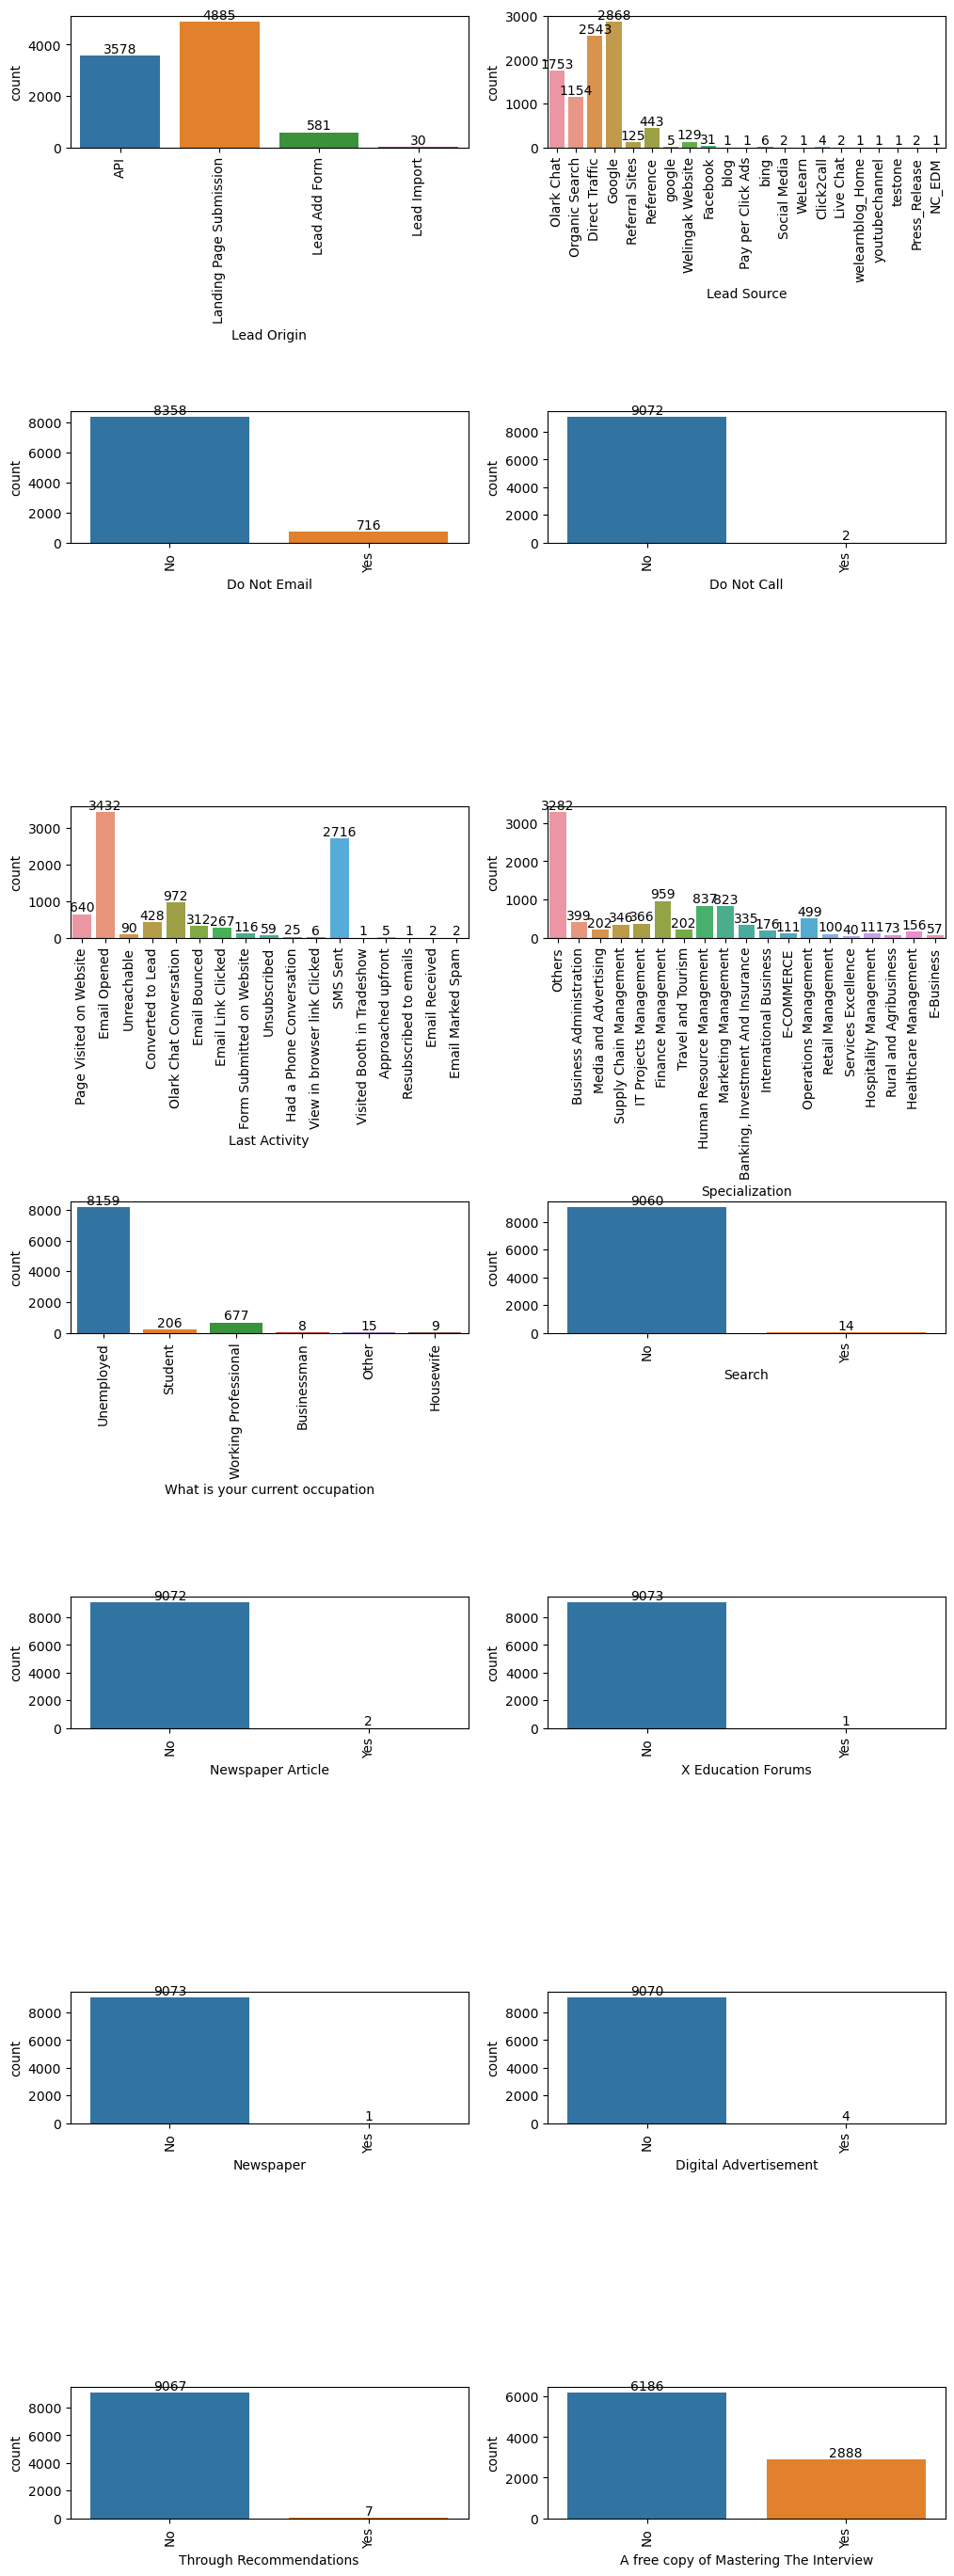

In [1622]:
# check remaining columns.
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = lead_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=lead_df) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

NOTE: Following columns have data which is highly skewed :

* 'Do Not Call',
* 'Search',
* 'Newspaper Article',
* 'X Education Forums',
* 'Newspaper',
* 'Digital Advertisement',
* 'Through Recommendations'.

These columns will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can lead to biased or inaccurate parameter estimates.

In [1623]:
# Dropping categorical columns with highly skewed data

lead_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",lead_df.shape)

After Drop:  (9074, 11)


##### Outliers

In [1624]:
# functions for ploting boxpolt

def get_outliers(data,columns):

    plt.figure(figsize=[20,10])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columns):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

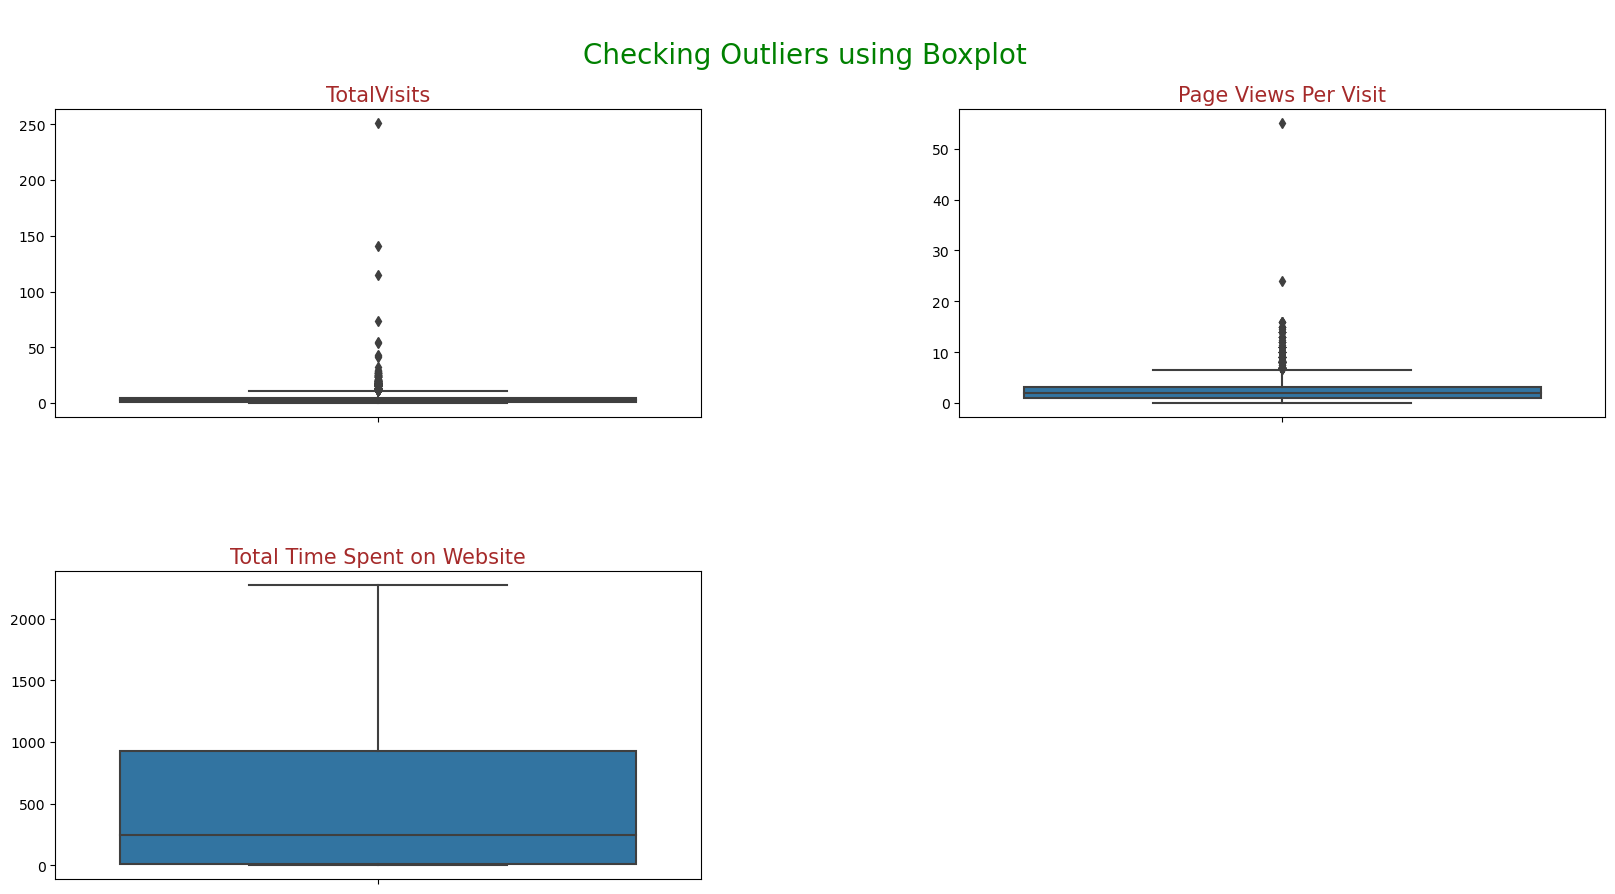

In [1625]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
get_outliers(lead_df,num_cols)

Observation : TotalVisits and PageViewsPerVista has outliers

#### Treatment of outliers

In [1626]:
# describe data in different percentiles.
lead_df.describe(percentiles=[.25,.50,.70,.75,.80,.90,.93,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
70%,1.000000,4.000000,693.000000,3.000000
75%,1.000000,5.000000,922.750000,3.200000
80%,1.000000,5.000000,1078.400000,4.000000
90%,1.000000,7.000000,1373.000000,5.000000


In [1627]:
# remove outliers at percentile 95%

lead_df = lead_df[(lead_df['TotalVisits'] <= 10) & (lead_df['Page Views Per Visit'] <= 7) & (lead_df['Total Time Spent on Website'] <= 1995)]
lead_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8552.000000,8552.000000,8552.000000,8552.000000
mean,0.374065,2.813962,466.476146,2.142405
std,0.483909,2.368245,536.900764,1.741052
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,233.000000,2.000000
75%,1.000000,4.000000,885.000000,3.000000
max,1.000000,10.000000,1995.000000,7.000000


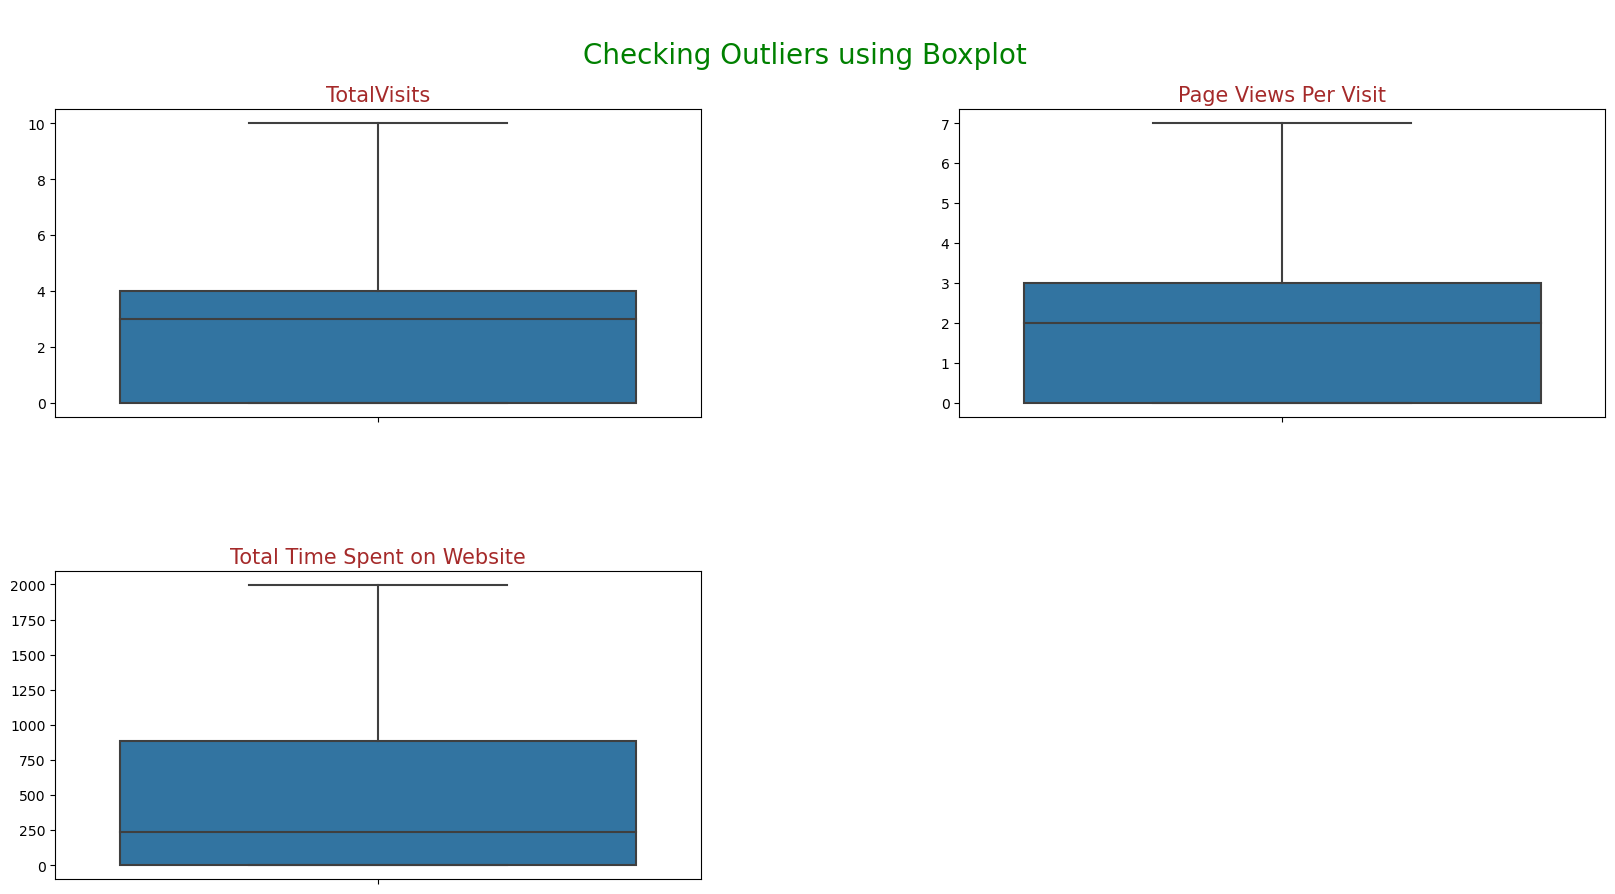

In [1628]:
get_outliers(lead_df,num_cols)

In [1629]:
# after outlier treatment detailed percentile values
lead_df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8552.000000,8552.000000,8552.000000,8552.000000
mean,0.374065,2.813962,466.476146,2.142405
std,0.483909,2.368245,536.900764,1.741052
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,233.000000,2.000000
75%,1.000000,4.000000,885.000000,3.000000
95%,1.000000,7.000000,1535.450000,5.000000
max,1.000000,10.000000,1995.000000,7.000000


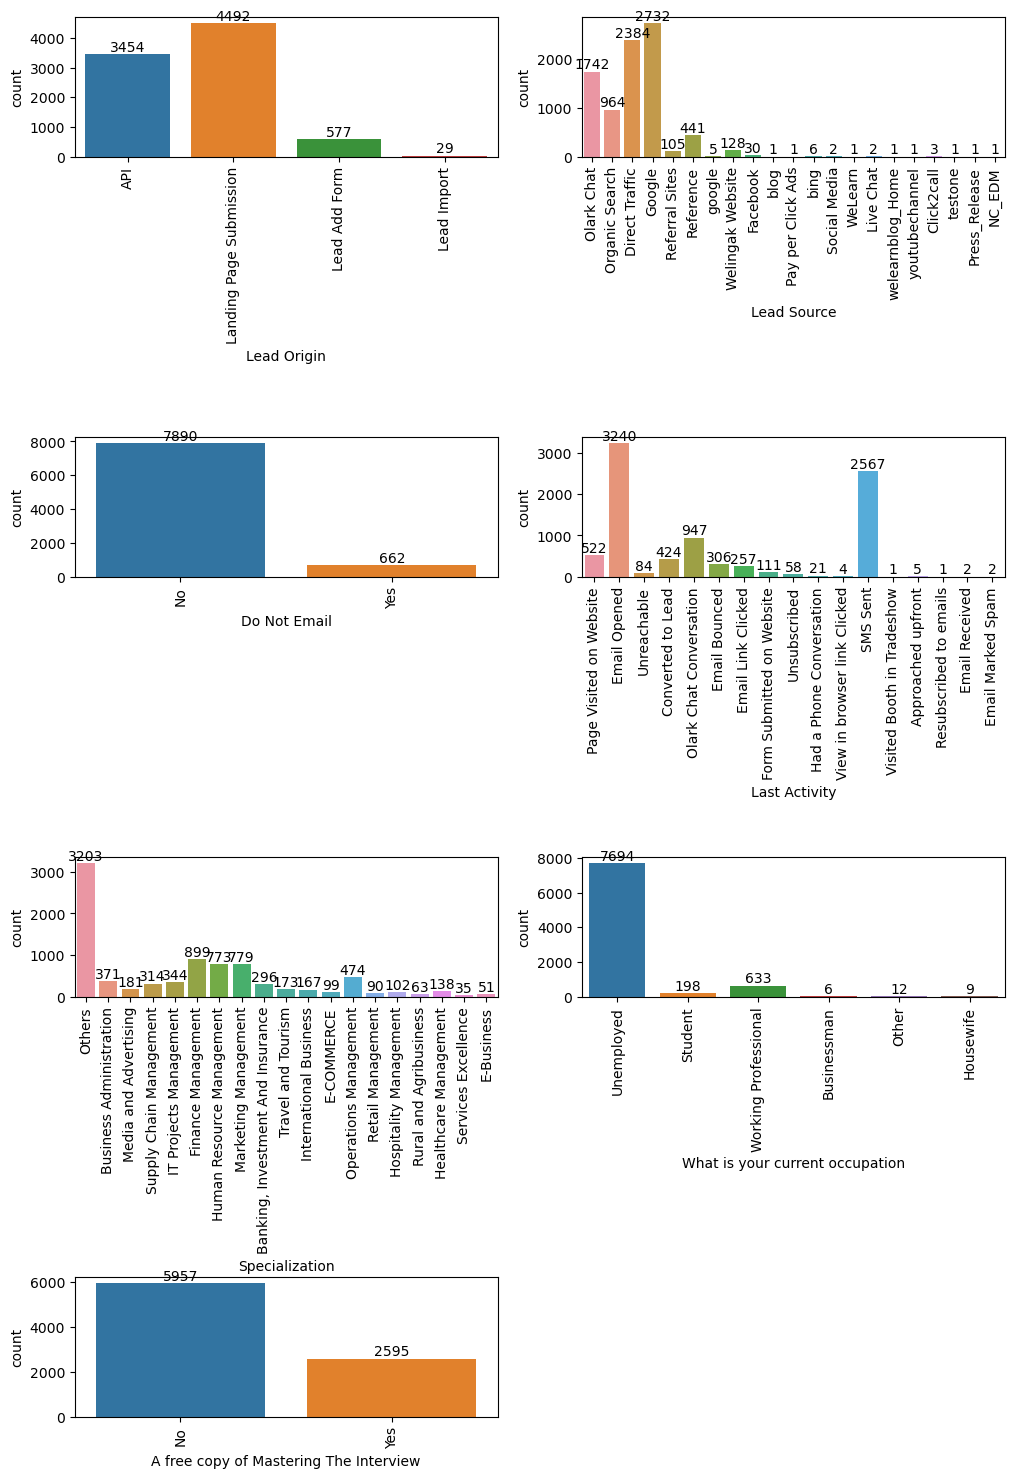

In [1630]:
# check remaining columns.
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = lead_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=lead_df) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

In [1631]:
# Changing google to Google
lead_df['Lead Source'] = lead_df['Lead Source'].replace("google","Google")


# # Grouping low frequency value levels to Others
# lead_df['Lead Source'] = lead_df['Lead Source'].replace(["bing","Click2call","Press_Release",
#                                                            "Social Media","Live Chat","youtubechannel",
#                                                            "testone","Pay per Click Ads","welearnblog_Home",
#                                                            "WeLearn","blog","NC_EDM"],"Others")



In [1632]:
# value_counts percentage after replace
lead_df["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google               32.004210
Direct Traffic       27.876520
Olark Chat           20.369504
Organic Search       11.272217
Reference             5.156688
Welingak Website      1.496726
Referral Sites        1.227783
Facebook              0.350795
bing                  0.070159
Click2call            0.035080
Social Media          0.023386
Live Chat             0.023386
Pay per Click Ads     0.011693
blog                  0.011693
WeLearn               0.011693
welearnblog_Home      0.011693
youtubechannel        0.011693
testone               0.011693
Press_Release         0.011693
NC_EDM                0.011693
Name: proportion, dtype: float64

In [1633]:
# Grouping low frequency value levels to Others 
# lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Unreachable','Unsubscribed',
#                                                                'Had a Phone Conversation', 
#                                                                'Approached upfront',
#                                                                'View in browser link Clicked',       
#                                                                'Email Marked Spam',                  
#                                                                'Email Received','Visited Booth in Tradeshow',
#                                                                'Resubscribed to emails'],'Others')

In [1634]:
# data type
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8552 non-null   object 
 1   Lead Source                             8552 non-null   object 
 2   Do Not Email                            8552 non-null   object 
 3   Converted                               8552 non-null   int64  
 4   TotalVisits                             8552 non-null   float64
 5   Total Time Spent on Website             8552 non-null   int64  
 6   Page Views Per Visit                    8552 non-null   float64
 7   Last Activity                           8552 non-null   object 
 8   Specialization                          8552 non-null   object 
 9   What is your current occupation         8552 non-null   object 
 10  A free copy of Mastering The Interview  8552 non-null   object 
d

In [1635]:
# Renaming column name to "Interview_copy" from "A free copy of Mastering The Interview"
lead_df.rename(columns={'A free copy of Mastering The Interview': 'Interview Copy'}, inplace=True)

# Renaming column name to "occupation" from "What is your current occupationA free copy of Mastering The Interview"
lead_df.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)

# Renaming column name to "Spend_Website" from "Total Time Spent on Website"
lead_df.rename(columns={'Total Time Spent on Website': 'Spend Website'}, inplace=True)

# Renaming column name to "Page_Visit" from "Page Views Per Visit"
lead_df.rename(columns={'Page Views Per Visit': 'Page Visit'}, inplace=True)

In [1636]:
# data type
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lead Origin     8552 non-null   object 
 1   Lead Source     8552 non-null   object 
 2   Do Not Email    8552 non-null   object 
 3   Converted       8552 non-null   int64  
 4   TotalVisits     8552 non-null   float64
 5   Spend Website   8552 non-null   int64  
 6   Page Visit      8552 non-null   float64
 7   Last Activity   8552 non-null   object 
 8   Specialization  8552 non-null   object 
 9   Occupation      8552 non-null   object 
 10  Interview Copy  8552 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 801.8+ KB


In [1637]:
# convert datatype od Do Not Email and Interview copy (Yes 1 / NO 0)


lead_df['Do Not Email'] = lead_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

lead_df['Interview Copy'] = lead_df['Interview Copy'].apply(lambda x: 1 if x =='Yes' else 0)


In [1639]:
# data type
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lead Origin     8552 non-null   object 
 1   Lead Source     8552 non-null   object 
 2   Do Not Email    8552 non-null   int64  
 3   Converted       8552 non-null   int64  
 4   TotalVisits     8552 non-null   float64
 5   Spend Website   8552 non-null   int64  
 6   Page Visit      8552 non-null   float64
 7   Last Activity   8552 non-null   object 
 8   Specialization  8552 non-null   object 
 9   Occupation      8552 non-null   object 
 10  Interview Copy  8552 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 801.8+ KB


#### Step 3 Data Analysis